In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import gym
from time import time,sleep
sns.set_style("darkgrid")

/home/raphael/rl_introduction/venv/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# ENVIRONMENT - AGENT

The environment encapsules the rules ($\mathbb{P}(S_{t+1},R_{t+1}|S_t,A_t)$) that gives feedback to the agent.

Science of environments is hard, particulary for real problems simulation (e.g for autonomous vehicules).

It is easiest when then environment is already define (e.g Videos Games).

### Minimal environment class

In [2]:
class Env:
    def __init__(self):
        self.state = 0
        self.done = False
        
    def step(self, action):
        ...
        return state, reward, done, info
        
        
    def reset(self):
        self.__init__()
        return self.state

### Exemple of environment

Environment generate a random state number. If the action is the same parity, reward is $1$, otherwise reward is $-1$

In [3]:
class Env_odd_even(Env):
    def step(self, action):
        if (action % 2 == 0 and self.state % 2 == 0) or (action % 2 == 1 and self.state % 2 == 1):
            reward = 1
        else:
            reward = -1
        self.state = np.random.randint(2)
        return self.state, reward, self.done, {}

### Random agent

In [4]:
def my_random_agent(state):
    action = np.random.randint(2)
    return action

### Super agent

In [5]:
def my_super_agent(state):
    if state % 2 == 0:
        action = 0
    else:
        action = 1
    return action

### Compute rewards in agent-environment interaction 

In [6]:
def run_experiment(env, agent, nb_step):
    states = np.zeros(nb_step)
    actions = np.zeros(nb_step)
    rewards = np.zeros(nb_step)
    state = env.reset()
    for i in range(nb_step):
        action = agent(state)
        state, reward, done, info = env.step(action)
        rewards[i] = reward
        states[i] = state
        actions[i] = action
    return states, actions, rewards

Text(0.5, 1.0, 'cumulative reward - random_agent')

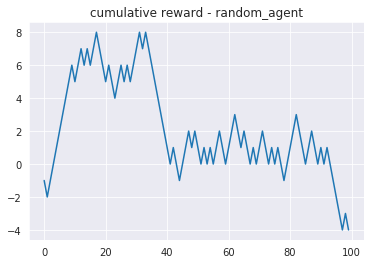

In [7]:
env = Env_odd_even()
_, _, rewards = run_experiment(env, my_random_agent, 100)
plt.plot(rewards.cumsum())
plt.title('cumulative reward - random_agent')

Text(0.5, 1.0, 'cumulative reward - super_agent')

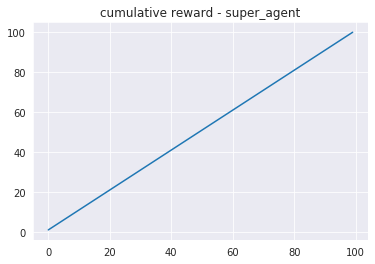

In [8]:
env = Env_odd_even()
_, _, rewards = run_experiment(env, my_super_agent, 100)
plt.plot(rewards.cumsum())
plt.title('cumulative reward - super_agent')

### Exemple of environment with end of episode
Environment generate a random state number. If the action is the same parity, reward is $1$, otherwise reward is $-1$. If the agent wins 3 consectives times, the episode ends. After 500 iterations, episode ends.

In [9]:
class Env_odd_even2(Env):
    def __init__(self):
        self.state = 0
        self.done = False
        self.nb_win = 0
        self.limit_game = 500
    def step(self, action):
        if (action % 2 == 0 and self.state % 2 == 0) or (action % 2 == 1 and self.state % 2 == 1):
            self.nb_win += 1
            reward = 1
        else:
            self.nb_win = 0
            reward = -1
        self.state = np.random.randint(2)
        if self.nb_win == 3 or self.limit_game == 0:
            self.done = True
        self.limit_game -= 1
        return self.state, reward, self.done, {}

In [10]:
def run_experiment_episode(env, agent, nb_episode):
    rewards = np.zeros(nb_episode)
    for i in range(nb_episode):
        state = env.reset()
        rews = []
        while env.done is False:
            action = agent(state)
            state, reward, done, info = env.step(action)
            rews.append(reward)
        rewards[i] = sum(rews)
    return rewards

Text(0.5, 1.0, 'cumulative reward per episode - random_agent')

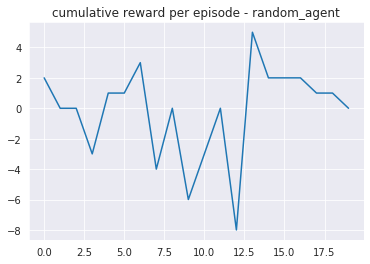

In [11]:
env = Env_odd_even2()
rewards = run_experiment_episode(env, my_random_agent, 20)
plt.plot(rewards)
plt.title('cumulative reward per episode - random_agent')

Text(0.5, 1.0, 'cumulative reward per episode - super_agent')

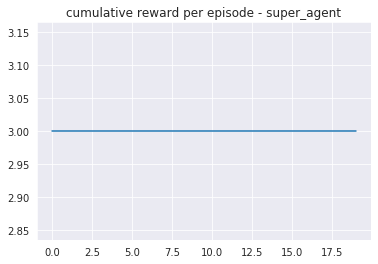

In [12]:
env = Env_odd_even2()
rewards = run_experiment_episode(env, my_super_agent, 20)
plt.plot(rewards)
plt.title('cumulative reward per episode - super_agent')

# ENVIRONMENT FROM OPENAI
https://gym.openai.com/envs/#atari

## Discrete state action environment

### NChain

<img src="images/NChain-illustration.png">

In [28]:
env = gym.make('NChain-v0')
print('description action space:', env.action_space)
print('description observation space:', env.observation_space)
print('run some random iteration:')
env.reset()
for _ in range(3):
    print()
    action = env.action_space.sample()
    print('action: ')
    print(action)
    state, reward, done, info = env.step(action)
    print('state: ')
    print(state)
    print('reward: ')
    print(reward)

description action space: Discrete(2)
description observation space: Discrete(5)
run some random iteration:

action: 
1
state: 
0
reward: 
2

action: 
1
state: 
0
reward: 
2

action: 
0
state: 
1
reward: 
0


## Discrete action continuous space environment

### CartPole
A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every timestep that the pole remains upright. The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.
<img src="images/CartPole-v1.png">
observations: position of cart, velocity of cart, angle of pole, rotation rate of pole

In [30]:
env = gym.make('CartPole-v0')
env.reset()
print('description action space:', env.action_space)
print('description observation space:', env.observation_space)
print('run some random iteration:')
for _ in range(3):
    print()
    action = env.action_space.sample()
    print('action: ')
    print(action)
    state, reward, done, info = env.step(action)
    print('state: ')
    print(state)
    print('reward: ')
    print(reward)

description action space: Discrete(2)
description observation space: Box(4,)
run some random iteration:

action: 
1
state: 
[ 0.00447252  0.18850355 -0.01344357 -0.29877763]
reward: 
1.0

action: 
1
state: 
[ 0.0082426   0.38381452 -0.01941912 -0.59566991]
reward: 
1.0

action: 
1
state: 
[ 0.01591889  0.57920279 -0.03133252 -0.89440591]
reward: 
1.0


## Continuous action-space environment

### MountainCarContinuous
An underpowered car must climb a one-dimensional hill to reach a target. Unlike MountainCar v0, the action (engine force applied) is allowed to be a continuous value.

The target is on top of a hill on the right-hand side of the car. If the car reaches it or goes beyond, the episode terminates.

On the left-hand side, there is another hill. Climbing this hill can be used to gain potential energy and accelerate towards the target. On top of this second hill, the car cannot go further than a position equal to -1, as if there was a wall. Hitting this limit does not generate a penalty (it might in a more challenging version).
<img src="images/MountainCarContinuous-v0.png">

In [32]:
env = gym.make('MountainCarContinuous-v0')
env.reset()
print('description action space:', env.action_space)
print('description observation space:', env.observation_space)
print('run some random iteration:')
for _ in range(3):
    print()
    action = env.action_space.sample()
    print('action: ')
    print(action)
    state, reward, done, info = env.step(action)
    print('state: ')
    print(state)
    print('reward: ')
    print(reward)

description action space: Box(1,)
description observation space: Box(2,)
run some random iteration:

action: 
[-0.5792841]
state: 
[-5.9120876e-01 -3.6802483e-04]
reward: 
-0.0335570035982883

action: 
[0.88545126]
state: 
[-0.589745    0.00146376]
reward: 
-0.07840239289281535

action: 
[0.27368283]
state: 
[-0.58737787  0.00236713]
reward: 
-0.007490229292449158


### LunarLanderContinuous
Landing pad is always at coordinates (0,0). Coordinates are the first two numbers in state vector. Reward for moving from the top of the screen to landing pad and zero speed is about 100..140 points. If lander moves away from landing pad it loses reward back. Episode finishes if the lander crashes or comes to rest, receiving additional -100 or +100 points. Each leg ground contact is +10. Firing main engine is -0.3 points each frame. Solved is 200 points. Landing outside landing pad is possible. Fuel is infinite, so an agent can learn to fly and then land on its first attempt. Action is two real values vector from -1 to +1. First controls main engine, -1..0 off, 0..+1 throttle from 50% to 100% power. Engine can't work with less than 50% power. Second value -1.0..-0.5 fire left engine, +0.5..+1.0 fire right engine, -0.5..0.5 off.
<img src="images/LunarLanderContinuous-v2.png">

In [33]:
env = gym.make('LunarLanderContinuous-v2')
env.reset()
print('description action space:', env.action_space)
print('description observation space:', env.observation_space)
print('run some random iteration:')
print()
for _ in range(3):
    action = env.action_space.sample()
    print('action: ')
    print(action)
    state, reward, done, info = env.step(action)
    print('state: ')
    print(state)
    print('reward: ')
    print(reward)

description action space: Box(2,)
description observation space: Box(8,)
run some random iteration:

action: 
[-0.09228861  0.7226398 ]
state: 
[-0.01134996  1.3885674  -0.5696257  -0.50963384  0.01160498  0.09978081
  0.          0.        ]
reward: 
-0.44792124510868914
action: 
[0.6503873  0.95863956]
state: 
[-0.0167696   1.3772422  -0.5453173  -0.50337416  0.01492626  0.06643168
  0.          0.        ]
reward: 
2.7385190490570355
action: 
[-0.42486134  0.6915487 ]
state: 
[-0.02212543  1.3653201  -0.5373167  -0.5298851   0.01664041  0.03428587
  0.          0.        ]
reward: 
-0.2590854510374561


## High space dimension environment

### Atari games


In [38]:
env = gym.make('Breakout-v0')
env.reset()
print('description action space:', env.action_space)
print('description observation space:', env.observation_space)
print('run some random iteration:')
print()
for _ in range(3):
    action = env.action_space.sample()
    print('action: ')
    print(action)
    state, reward, done, info = env.step(action)
    print('state: ')
    print(state)
    print('reward: ')
    print(reward)

description action space: Discrete(4)
description observation space: Box(210, 160, 3)
run some random iteration:

action: 
0
state: 
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
reward: 
0.0
action: 
3
state: 
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
reward:

# Run Random agent in open ai gym

In [17]:
env = gym.make('MountainCarContinuous-v0')


In [18]:
class Agent:
    def __init__(self, env):
        self.env = env
    def act(self, state):
        pass

In [19]:
class AgentRandom(Agent):
    def act(self, state):
        return self.env.action_space.sample()

In [20]:
agent_rand = AgentRandom(env)

In [21]:
class RunAgentEnv:
    def __init__(self, agent, env, nb_step):
        self.agent = agent
        self.env = env
        self.nb_step = nb_step
        self.rewards = np.zeros(nb_step)
    def run_experiment(self):
        state = self.env.reset()
        for i in range(self.nb_step):
            action = self.agent.act(state)
            state, reward, done, info = self.env.step(action)
            self.rewards[i] = reward
            if done is True:
                state = self.env.reset()
        return self.rewards

In [22]:
run = RunAgentEnv(agent_rand, env, 1000)

In [23]:
rewards = run.run_experiment()

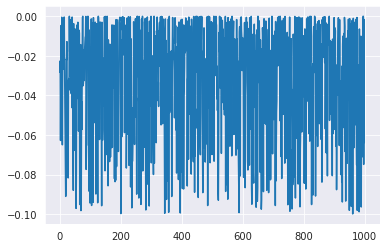

In [24]:
plt.plot(rewards)